In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import talib as ta
import pyfolio as pf

In [2]:
symbol = 'MSFT'
start = '2018-01-01'
end = '2019-12-31'
source = 'yahoo'
ndays_high = 20
ndays_low = 20
equity = 10000


df = web.DataReader(symbol, source, start, end)
df.tail(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-27,159.550003,158.220001,159.449997,158.960007,18412800.0,156.932251
2019-12-30,159.020004,156.729996,158.990005,157.589996,16348400.0,155.579727
2019-12-31,157.770004,156.449997,156.770004,157.699997,18369400.0,155.688324


In [3]:
df['ndays_high'] = df['High'].rolling(ndays_high).max().shift(1)
df['ndays_low'] = df['Low'].rolling(ndays_low).min().shift(1)
df.tail(5)

,High,Low,Open,Close,Volume,Adj Close,ndays_high,ndays_low
Date,,,,,,,,
2019-12-24,157.710007,157.119995,157.479996,157.380005,8989200.0,155.372406,158.490005,146.649994
2019-12-26,158.729996,157.399994,157.559998,158.669998,14520600.0,156.645950,158.490005,146.649994
2019-12-27,159.550003,158.220001,159.449997,158.960007,18412800.0,156.932251,158.729996,146.649994
2019-12-30,159.020004,156.729996,158.990005,157.589996,16348400.0,155.579727,159.550003,146.649994
2019-12-31,157.770004,156.449997,156.770004,157.699997,18369400.0,155.688324,159.550003,146.649994


In [4]:
df['Signal'] = 0
df['Signal'] = np.where(df['Close'] > df['ndays_high'], 1, 0)
df['Signal'] = np.where(df['Close'] < df['ndays_low'], -1, df['Signal'])
df['Signal'] = df['Signal'].replace(0, np.nan).ffill()
df['Position'] = df['Signal'].replace(-1, 0).shift(1)
df.tail()

,High,Low,Open,Close,Volume,Adj Close,ndays_high,ndays_low,Signal,Position
Date,,,,,,,,,,
2019-12-24,157.710007,157.119995,157.479996,157.380005,8989200.0,155.372406,158.490005,146.649994,1.0,1.0
2019-12-26,158.729996,157.399994,157.559998,158.669998,14520600.0,156.645950,158.490005,146.649994,1.0,1.0
2019-12-27,159.550003,158.220001,159.449997,158.960007,18412800.0,156.932251,158.729996,146.649994,1.0,1.0
2019-12-30,159.020004,156.729996,158.990005,157.589996,16348400.0,155.579727,159.550003,146.649994,1.0,1.0
2019-12-31,157.770004,156.449997,156.770004,157.699997,18369400.0,155.688324,159.550003,146.649994,1.0,1.0


C:\Users\nh303\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\plotting\_compat.py:57: MatplotlibDeprecationWarning: 
The compare_versions function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  return matplotlib.compare_versions('2.0.0', matplotlib.__version__)


<AxesSubplot:xlabel='Date'>

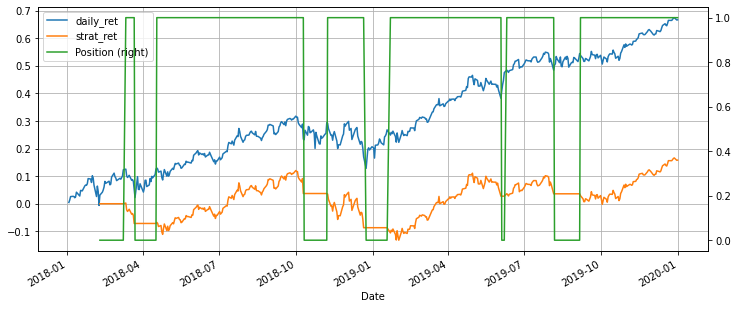

In [5]:
df['daily_ret'] = df['Close'].pct_change()


df['strat_ret'] = df['daily_ret'] * df['Position']


df2 = df[['daily_ret', 'strat_ret']].cumsum()
df2['Position'] = df['Position']
df2[['daily_ret', 'strat_ret', 'Position']].plot(secondary_y='Position', grid=True, figsize=(12,5))